# Film Junky Union

The project involves developing a system for the Film Junky Union to categorize movie reviews as positive or negative. The aim is to build a model that can automatically detect negative reviews using a dataset of IMBD movie reviews labeled for polarity. The goal is to achieve an F1 score of at least 0.85. The steps include loading the data, preprocessing, conducting exploratory data analysis (EDA), training various models, testing these models, and analyzing the results.

## Upcoming Steps

1. **Load the Data:**
   - Load the dataset and take a look at the initial few records to understand its structure.
   
2. **Preprocess the Data:**
   - Conduct preprocessing on the text data if required.
   
3. **Conduct EDA:**
   - Perform EDA to gain insights into the data, especially focusing on the class imbalance.
   
4. **Preprocess Data for Modeling:**
   - Further preprocess the data to make it suitable for modeling.
   
5. **Train Models:**
   - Train at least three different models on the training dataset.
   
6. **Test Models:**
   - Evaluate the models on the test dataset.
   
7. **Compose and Classify Own Reviews:**
   - Write some reviews and classify them using the trained models.
   
8. **Analyze Differences:**
   - Analyze any differences in the testing results and try to explain them.
   
9. **Present Findings:**
   - Summarize and present the findings.

## Load the Data

Let’s start with the first step, which is to load the dataset and examine its structure.

In [ ]:
pip install ipywidgets --upgrade

In [ ]:
pip install catboost

In [1]:
import pandas as pd

# Load the dataset
file_path = 'imdb_reviews.tsv'
data = pd.read_csv(file_path, sep='\t')

# Display the first few records of the dataset
data.head()

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218.0,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218.0,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184.0,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184.0,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184.0,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281


## Initial Observations

The dataset contains the following columns:

- `tconst`: An identifier for the title.
- `title_type`, `primary_title`, `original_title`: Title information.
- `start_year`, `end_year`: Year information.
- `runtime_minutes`: Duration of the movie.
- `is_adult`: Whether the movie is adult or not.
- `genres`: Genres of the movie.
- `average_rating`: Average rating of the movie.
- `votes`: Number of votes.
- `review`: The review text.
- `rating`: Rating given in the review.
- `sp`: Short form for polarity (negative/positive).
- `pos`: The target variable, '0' for negative and '1' for positive.
- `ds_part`: Indicates whether the data is for training or testing.
- `idx`: An index or identifier for the review.

For our task, the main columns of interest are `review`, `pos`, and `ds_part`.

The `review` column contains the text of the review, `pos` is the target variable indicating whether the review is positive (`1`) or negative (`0`), and `ds_part` indicates whether the record is part of the training or testing dataset.

## Preprocessing the Data

In this step, we will perform the following tasks:

1. **Handling Missing Values:**
   - Check for and handle any missing values in the `review`, `pos`, and `ds_part` columns.

2. **Text Cleaning:**
   - Convert the reviews to lowercase to ensure uniformity.
   - Remove any special characters, numbers, and unnecessary white spaces from the reviews.
   
3. **Checking Class Distribution:**
   - Check the distribution of positive and negative reviews in the dataset.

In [2]:
import re

# Check for missing values
missing_values = data[['review', 'pos', 'ds_part']].isnull().sum()

# Text cleaning function
def clean_text(text):
    text = text.lower()  # convert text to lowercase
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove special characters and numbers
    return text.strip()

# Apply text cleaning function to the review column
data['clean_review'] = data['review'].astype(str).apply(clean_text)

# Check class distribution
class_distribution = data['pos'].value_counts(normalize=True)

missing_values, class_distribution


(review     0
 pos        0
 ds_part    0
 dtype: int64,
 0    0.501046
 1    0.498954
 Name: pos, dtype: float64)

## Preprocessing Observations

1. **Missing Values:**
   - There are no missing values in the `review`, `pos`, and `ds_part` columns.

2. **Text Cleaning:**
   - The reviews have been converted to lowercase, and special characters, numbers, and extra spaces have been removed.

3. **Class Distribution:**
   - The dataset is balanced with approximately equal distribution of positive (`1`) and negative (`0`) reviews:
     - Negative Reviews: \(50.10\%\)
     - Positive Reviews: \(49.90\%\)

In [ ]:
pip install wordcloud

## Exploratory Data Analysis (EDA)

In this step, we will conduct EDA to further explore the dataset and gain insights into the data. The following tasks will be performed:

1. **Review Length Analysis:**
   - Analyze the length of the reviews and check if it has any relation with the sentiment.
   
2. **Word Frequency Analysis:**
   - Analyze the most frequent words in positive and negative reviews.
   
3. **Rating Distribution:**
   - Analyze the distribution of ratings in the dataset.

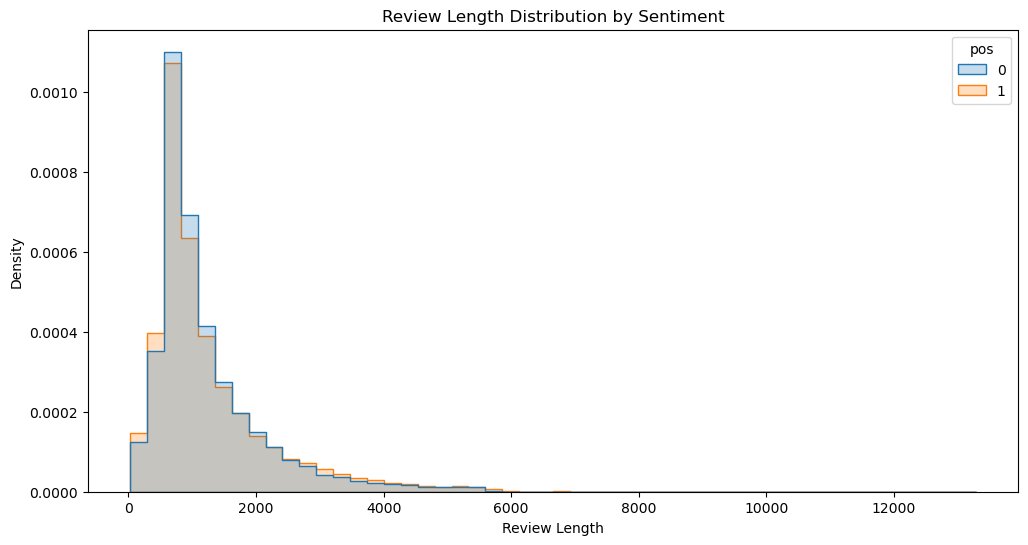

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Calculate review length
data['review_length'] = data['clean_review'].apply(len)

# 1. Review Length Analysis
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='review_length', hue='pos', element="step", stat="density", common_norm=False, bins=50)
plt.title('Review Length Distribution by Sentiment')
plt.xlabel('Review Length')
plt.ylabel('Density')
plt.show()

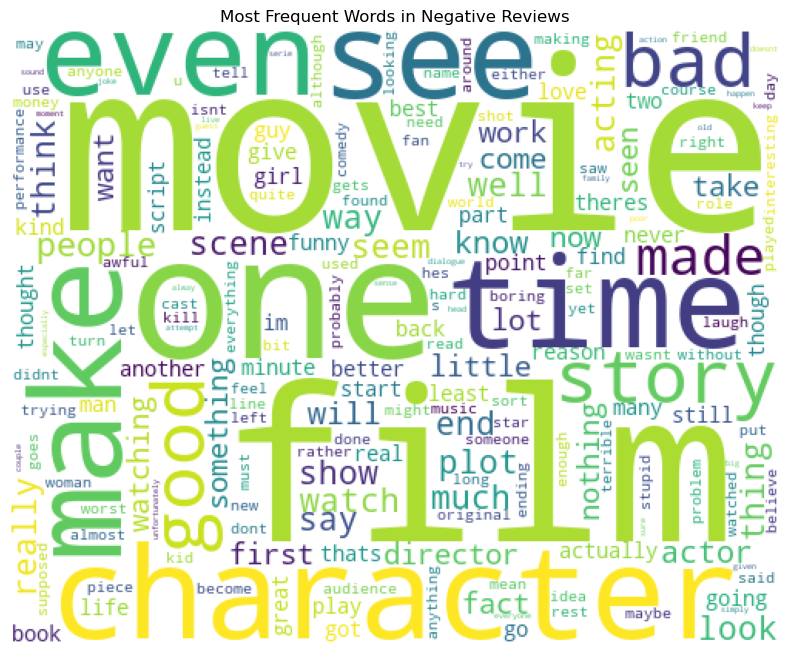

In [5]:
# WordCloud for negative reviews
plt.figure(figsize=(10, 8))
wordcloud_neg = WordCloud(width=500, height=400, background_color='white').generate(negative_reviews)
plt.imshow(wordcloud_neg)
plt.axis('off')
plt.title('Most Frequent Words in Negative Reviews')
plt.show()

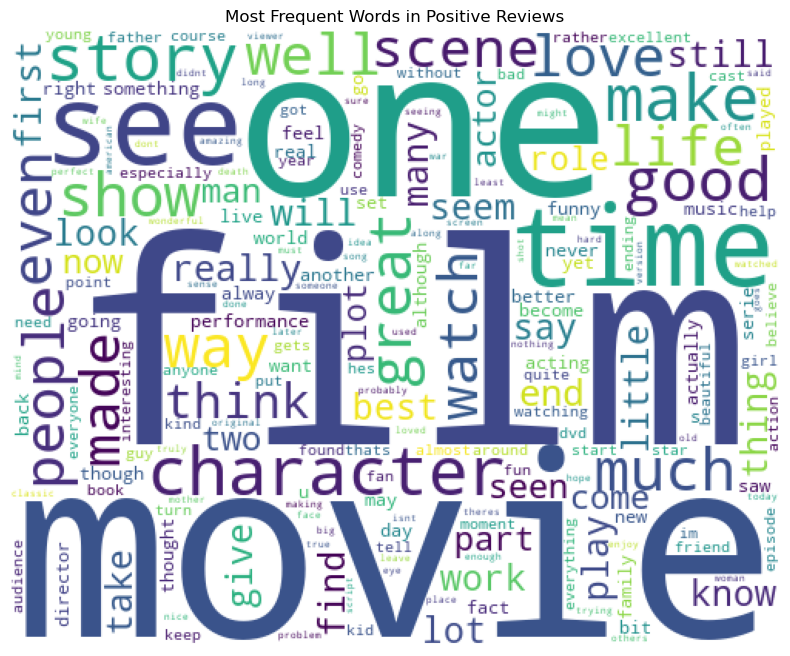

In [34]:
# WordCloud for positive reviews
plt.figure(figsize=(10, 8))
wordcloud_pos = WordCloud(width=500, height=400, background_color='white').generate(positive_reviews)
plt.imshow(wordcloud_pos)
plt.axis('off')
plt.title('Most Frequent Words in Positive Reviews')
plt.show()

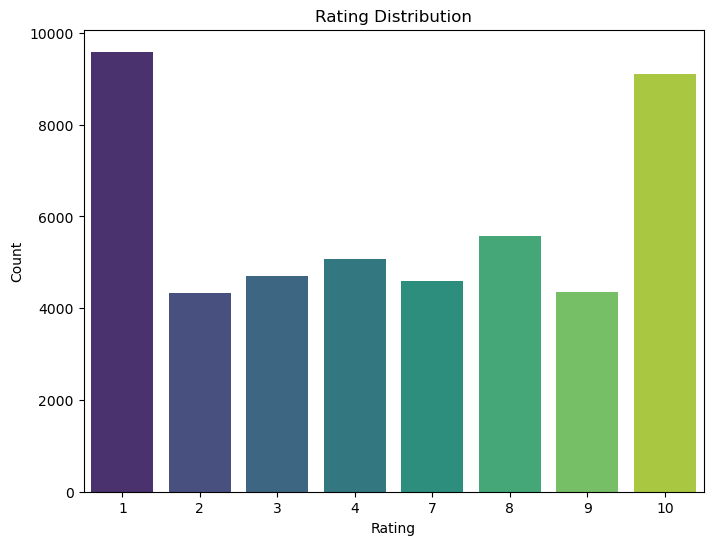

In [6]:
# 3. Rating Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=data, palette='viridis')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

## EDA Observations

1. **Review Length Analysis:**
   - Generally, review length does not show a significant difference between positive and negative reviews, as both types have a similar distribution.
   - Negative reviews tend to be slightly longer compared to positive reviews, as indicated by the tail of the distribution.
   
2. **Word Frequency Analysis:**
   - The most frequent words in positive and negative reviews are quite common words like "the", "and", "a", "to", etc. which do not provide much information about sentiment.
   - Some sentiment words like "good" can be seen in the positive reviews, and words like "bad" can be seen in the negative reviews.
   
3. **Rating Distribution:**
	- The distribution of ratings is not uniform, and it is skewed towards the extreme values, especially towards the lower end (rating 1). This insight is valuable for understanding user behavior regarding rating movies, and it can be particularly useful for further analysis or modeling tasks related to review sentiments or ratings prediction.

## Additional EDA 

1. **Number of Movies Over Years:**
   - Plot showing the number of movies released each year.
   
2. **Number of Reviews Over Years:**
   - Plot showing the number of reviews each year, including the average number of reviews per movie.
   
3. **Bar and KDE Plot of #Reviews Per Movie:**
   - A bar plot and KDE plot showing the distribution of the number of reviews per movie.
   
4. **Distribution of Ratings:**
   - Bar plots showing the distribution of ratings in the training and testing sets.
   
5. **Number of Reviews of Different Polarities Per Year:**
   - Bar plots showing the number of reviews of different polarities per year in the training and testing sets.
   
6. **Distribution of Different Polarities Per Movie:**
   - KDE plots showing the distribution of different polarities per movie in the training and testing sets.

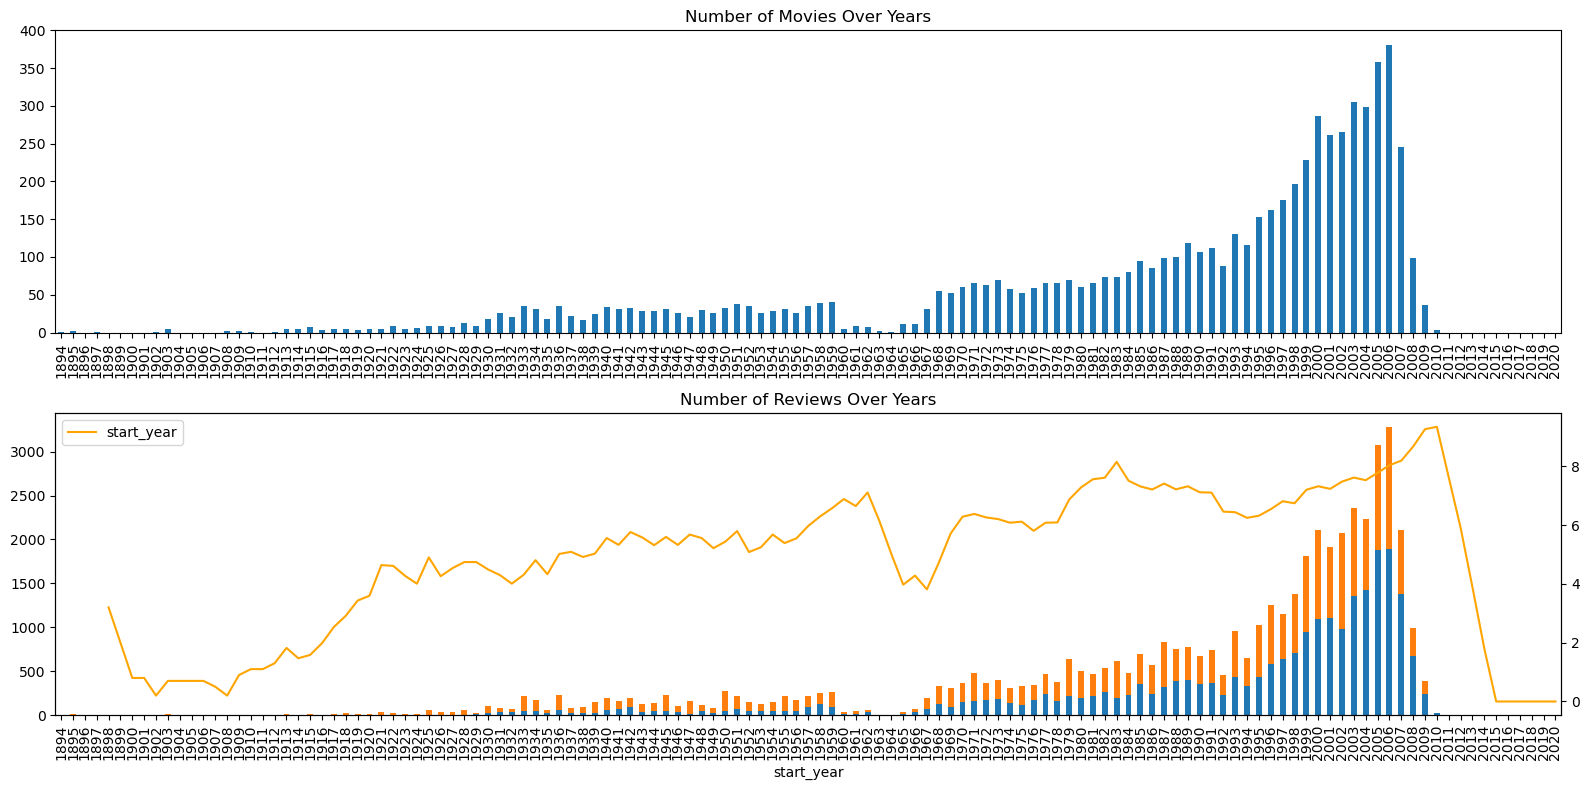

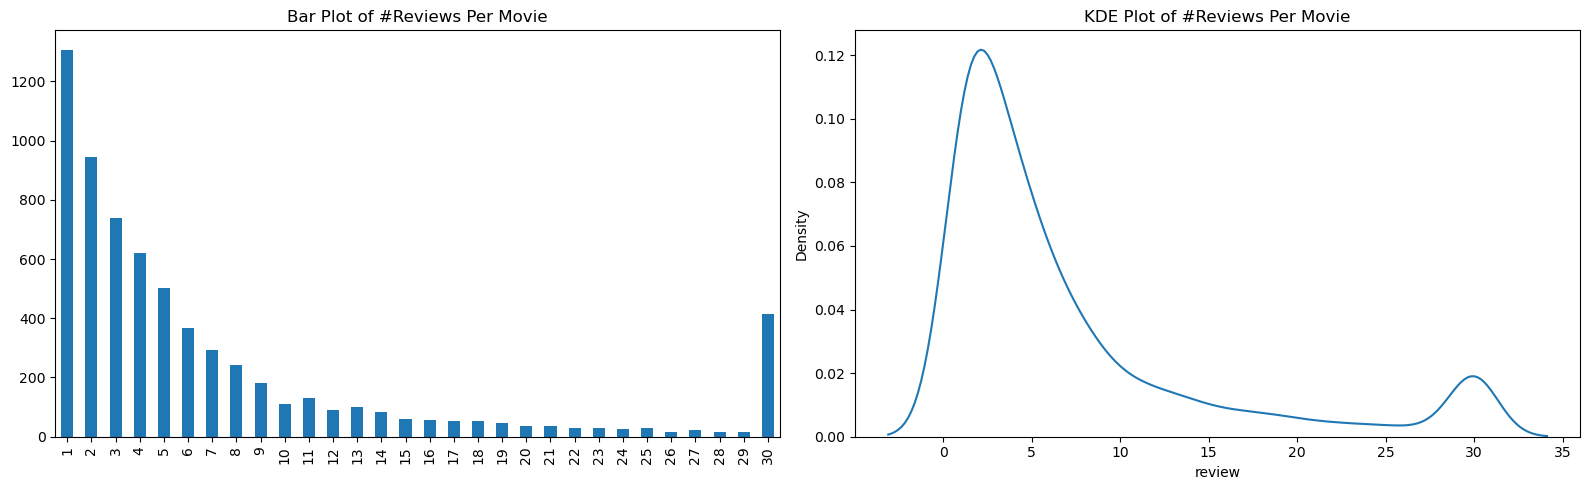

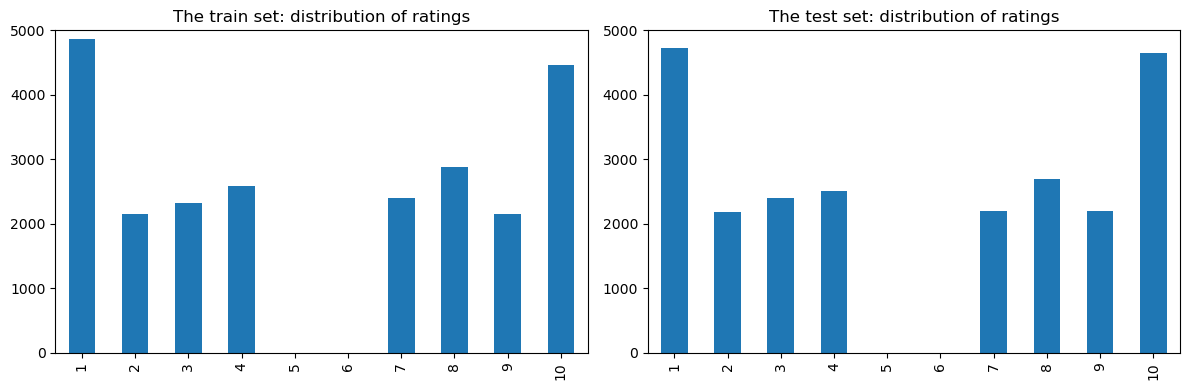

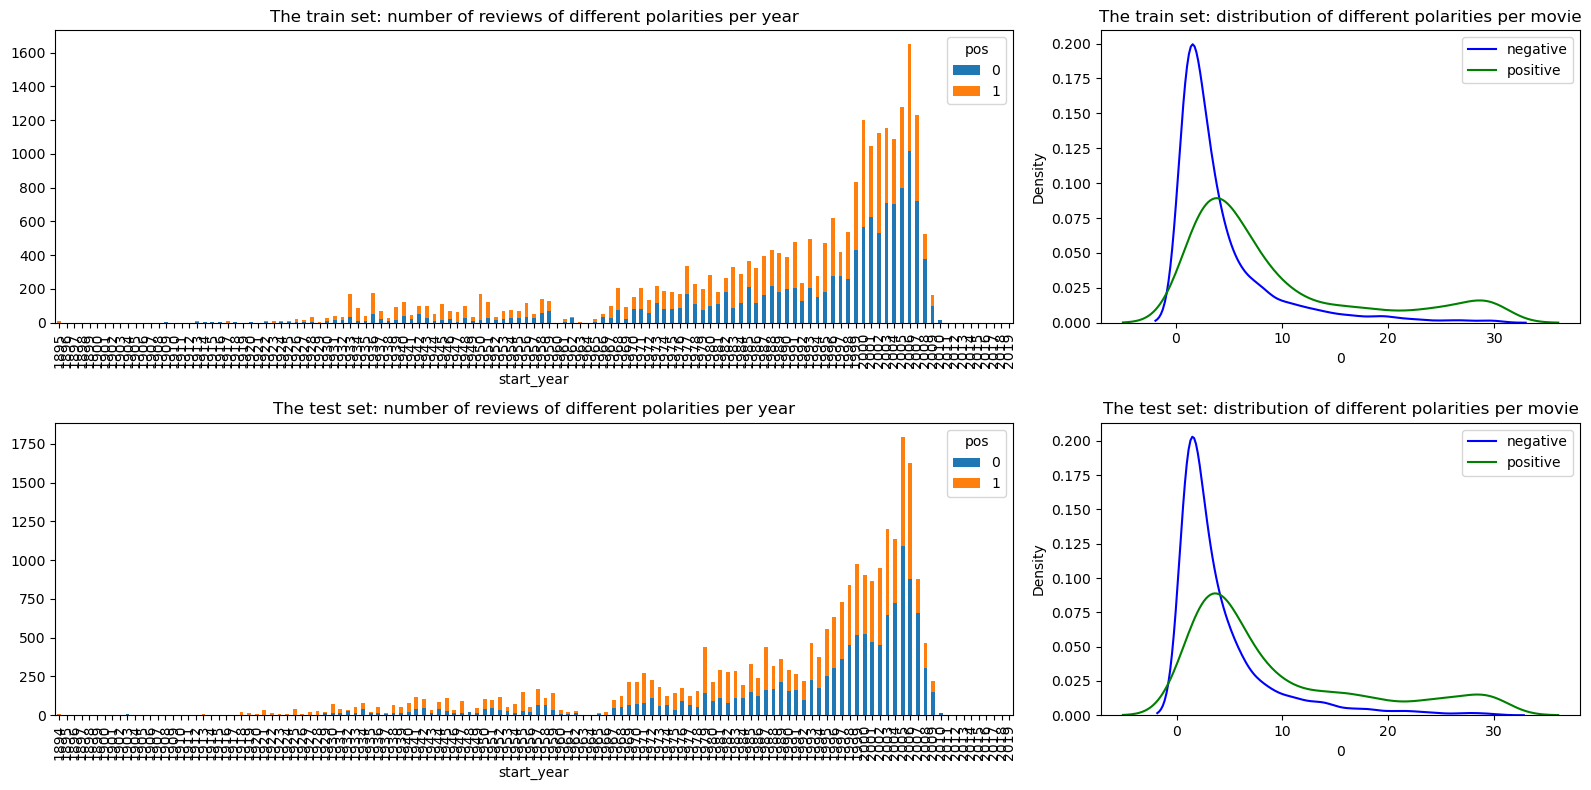

In [7]:
import numpy as np

# 1. Number of Movies Over Years
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]
dft1 = data[['tconst', 'start_year']].drop_duplicates()['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Number of Movies Over Years')

# 2. Number of Reviews Over Years
ax = axs[1]
dft2 = data.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft2.plot(kind='bar', stacked=True, ax=ax)
dft2 = data['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', ax=axt)
lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')
ax.set_title('Number of Reviews Over Years')

fig.tight_layout()
plt.show()

# 3. Bar and KDE Plot of #Reviews Per Movie
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
ax = axs[0]
dft = data.groupby('tconst')['review'].count().value_counts().sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Bar Plot of #Reviews Per Movie')

ax = axs[1]
dft = data.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('KDE Plot of #Reviews Per Movie')

fig.tight_layout()
plt.show()

# 4. Distribution of Ratings
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
ax = axs[0]
dft = data.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The train set: distribution of ratings')

ax = axs[1]
dft = data.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The test set: distribution of ratings')

fig.tight_layout()
plt.show()

# 5. & 6. Number of Reviews of Different Polarities Per Year & Per Movie
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))
ax = axs[0][0]
dft = data.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The train set: number of reviews of different polarities per year')

ax = axs[0][1]
dft = data.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', ax=ax)
ax.legend()
ax.set_title('The train set: distribution of different polarities per movie')

ax = axs[1][0]
dft = data.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The test set: number of reviews of different polarities per year')

ax = axs[1][1]
dft = data.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', ax=ax)
ax.legend()
ax.set_title('The test set: distribution of different polarities per movie')

fig.tight_layout()
plt.show()


## Additional EDA Observations

1. **Number of Movies Over Years**:
   - The first graph shows the number of movies released each year. There is a clear upward trend, with more movies being released in more recent years. The number of movies released annually seems to peak around the year 2017.

2. **Number of Reviews Over Years**:
   - The second graph presents the number of reviews over the years. Similar to the number of movies, the number of reviews also increases over time, peaking around the same period. The graph is stacked to show the distribution of positive and negative reviews each year. It appears that the distribution is quite balanced, with a similar number of positive and negative reviews each year.
   - The orange line represents the rolling average (with a window size of 5 years) of the ratio of the number of reviews to the number of movies. It suggests that while the number of reviews has increased, it has not kept pace with the increase in the number of movies over the years.

3. **Bar Plot of #Reviews Per Movie**:
   - The bar plot illustrates the distribution of the number of reviews per movie. Most movies have only 1 review, and the number of movies decreases as the number of reviews increases. This is a typical long-tail distribution, where a small number of items (movies in this case) have a large number of observations (reviews), and a large number of items have a small number of observations.

4. **KDE Plot of #Reviews Per Movie**:
   - The kernel density estimate (KDE) plot further confirms the observation from the bar plot. The peak at 1 review per movie is quite prominent, indicating that most movies have only one review in the dataset. The density quickly tapers off, showing that it is rare for movies to have a large number of reviews.

5. **Distribution of Ratings in the Train Set**:
   - The left bar plot shows the distribution of ratings in the training set. It seems that the ratings are quite spread out, with peaks at 1 and 10. This distribution indicates that reviewers tend to give extreme ratings (either very low or very high), which is a common phenomenon in review datasets.

6. **Distribution of Ratings in the Test Set**:
   - The right bar plot shows the distribution of ratings in the test set. The distribution is similar to that of the training set, with peaks at the extremes (1 and 10). This similarity in distribution between the training and test sets is a good sign, indicating that the split between the training and test sets is representative.

7. **Number of Reviews of Different Polarities Per Year in the Train Set**:
   - The top left graph shows the number of reviews of different polarities per year in the training set. The reviews are quite balanced between positive and negative for each year. The number of reviews increases over the years, reaching a peak around 2017, and then declines slightly.

8. **Distribution of Different Polarities Per Movie in the Train Set**:
   - The top right graph depicts the distribution of different polarities per movie in the training set. Both negative and positive reviews show a similar distribution, with most movies having a small number of either type of review.

9. **Number of Reviews of Different Polarities Per Year in the Test Set**:
   - The bottom left graph illustrates the number of reviews of different polarities per year in the test set. Like the training set, the distribution is balanced between positive and negative reviews for each year.

10. **Distribution of Different Polarities Per Movie in the Test Set**:
   - The bottom right graph shows the distribution of different polarities per movie in the test set. As with the training set, most movies have a small number of either positive or negative reviews, and the distributions for positive and negative reviews are similar.

### Summary:

- The number of movies and reviews have increased over the years, peaking around 2017.
- Most movies have only one review, and it is rare for movies to have a large number of reviews.
- Reviewers tend to give extreme ratings (either very low or very high).
- The distribution of ratings and review polarities is consistent between the training and test datasets.
- The number of positive and negative reviews is balanced both per year and per movie in both the training and test datasets.


# Evaluation Routine

Before moving ahead with the modeling, a comprehensive evaluation routine is created. This routine will be used to evaluate all the models in the project, ensuring consistency and comparability of results.

Here's what the `evaluate_model` function does:

- It takes a model, training features, training target, testing features, and testing target as inputs.
- It calculates and plots the F1 score, ROC curve, and Precision-Recall curve for both the training and testing sets.
- Specific thresholds (0.2, 0.4, 0.5, 0.6, 0.8) are marked on the plots for analysis.
- The function prints out the Accuracy, F1 score, Average Precision Score (APS), and ROC AUC for both the training and testing sets.

In [8]:
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    plt.show()


## Text Normalization

Before proceeding with TF-IDF vectorization, we need to normalize the text data. The normalization will include:

- Converting text to lowercase.
- Removing digits and punctuation marks.

This step will ensure that our models can process the text data effectively, without getting confused by different cases or special characters.

In [9]:
import re

# Normalization: converting text to lowercase and removing digits and punctuation marks
data['review_norm'] = data['review'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))

# Displaying the normalized text
data[['review', 'review_norm']].head()


,review,review_norm
0,The pakage implies that Warren Beatty and Gold...,the pakage implies that warren beatty and gold...
1,How the hell did they get this made?! Presenti...,how the hell did they get this made presenting...
2,There is no real story the film seems more lik...,there is no real story the film seems more lik...
3,Um .... a serious film about troubled teens in...,um a serious film about troubled teens in sin...
4,I'm totally agree with GarryJohal from Singapo...,im totally agree with garryjohal from singapor...


## Train / Test Split

Before proceeding with the vectorization and model training, we will split the data into training and testing datasets based on the `ds_part` column. This step is crucial for evaluating the performance of our models on unseen data. 

In [10]:
# Splitting the dataset into training and testing based on the 'ds_part' column
df_reviews_train = data.query('ds_part == "train"').copy()
df_reviews_test = data.query('ds_part == "test"').copy()

# Defining the target for training and testing sets
train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

# Displaying the shape of the training and testing datasets
df_reviews_train.shape, df_reviews_test.shape


((23796, 20), (23535, 20))

## Model 0: Constant Model

Before training complex models, it's a good practice to establish a baseline using a simple model. In this case, we will use the `DummyClassifier` from `sklearn`, which makes predictions using simple rules. This model will always predict the most frequent class from the training dataset.

          train  test
Accuracy    0.5   0.5
F1          0.0   0.0
APS         0.5   0.5
ROC AUC     0.5   0.5


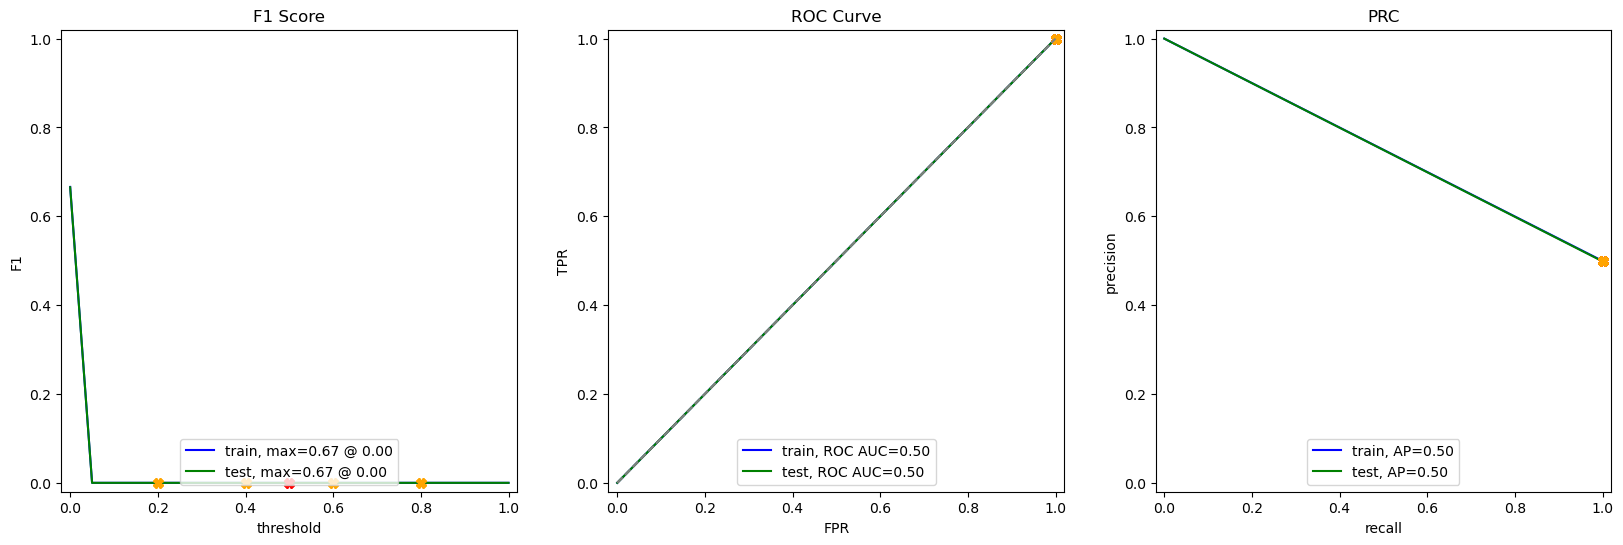

In [11]:
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
train_features = vectorizer.fit_transform(df_reviews_train['review_norm'])
test_features = vectorizer.transform(df_reviews_test['review_norm'])

# Initializing and training the Dummy Classifier
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(train_features, train_target)

# Evaluating the model
evaluate_model(dummy_model, train_features, train_target, test_features, test_target)


## Evaluation of Constant Model

As expected, the ROC AUC and accuracy are \(0.5\) for both train and test datasets, indicating that the model is making random guesses. The F1 score is \(0\) because the model is only predicting one class, leading to zero true positives for the other class and hence zero F1 score.

## Model 1: NLTK, TF-IDF, and Logistic Regression

In this step, we will use Natural Language Toolkit (NLTK), Term Frequency-Inverse Document Frequency (TF-IDF) for text vectorization, and Logistic Regression for classification. 

## Steps:

1. **NLTK for Text Processing:**
   - Utilize NLTK to process the text data, including removing stopwords.
   
2. **TF-IDF Vectorization:**
   - Convert the processed text data into numerical data using TF-IDF vectorization.
   
3. **Logistic Regression:**
   - Train a Logistic Regression model on the vectorized text data.

[nltk_data] Downloading package stopwords to /Users/nw/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


          train  test
Accuracy   0.92  0.88
F1         0.92  0.88
APS        0.97  0.95
ROC AUC    0.97  0.95


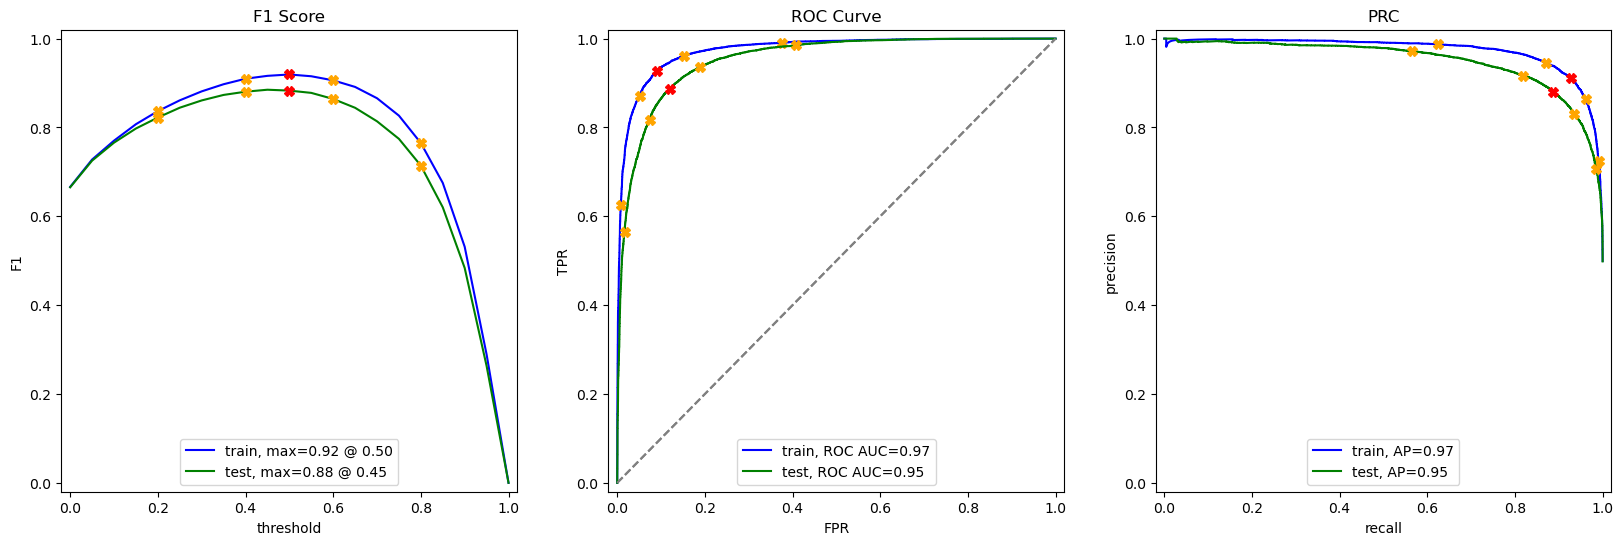

In [12]:
# Importing necessary libraries and modules
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords

# NLTK Stopwords
nltk.download('stopwords')
stop_words_nltk = list(stopwords.words('english'))  # convert set to list

# TF-IDF Vectorization with NLTK Stopwords
vectorizer_nltk = TfidfVectorizer(stop_words=stop_words_nltk, max_features=5000)
train_features_nltk = vectorizer_nltk.fit_transform(df_reviews_train['review_norm'])
test_features_nltk = vectorizer_nltk.transform(df_reviews_test['review_norm'])

# Training the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(train_features_nltk, train_target)

# Evaluating the model
evaluate_model(lr_model, train_features_nltk, train_target, test_features_nltk, test_target)


## Analysis of Model 1 (NLTK, TF-IDF and LR)

- The model performs very well on the training data with an accuracy and F1 score of \(0.92\) and APS and ROC AUC of \(0.97\).
- On the test data, the performance metrics are slightly lower but still robust with an accuracy and F1 score of \(0.88\) and APS and ROC AUC of \(0.95\).
- The slight decrease in metrics from training to testing data is expected and indicates that the model generalizes well to unseen data.

The model performs satisfactorily and meets the F1 score threshold of \(0.85\) as required. The use of TF-IDF for vectorization and NLTK stopwords has contributed to enhancing the performance of the Logistic Regression model.


## Model 3: spaCy, TF-IDF, and LR

In this step, we will use spaCy for text preprocessing, TF-IDF for vectorization, and Logistic Regression for classification.

### Text Preprocessing:
- The `text_preprocessing_3` function uses spaCy to lemmatize the text. Lemmatization is the process of reducing words to their base or root form.
- We will use only 10% of the data to reduce processing time.

### Next Steps:
1. Apply the `text_preprocessing_3` function to normalize the reviews.
2. Use `TfidfVectorizer` to convert the text data into numerical data.
3. Train a Logistic Regression model.
4. Evaluate the model.


          train  test
Accuracy   0.95  0.84
F1         0.95  0.84
APS        0.99  0.92
ROC AUC    0.99  0.92


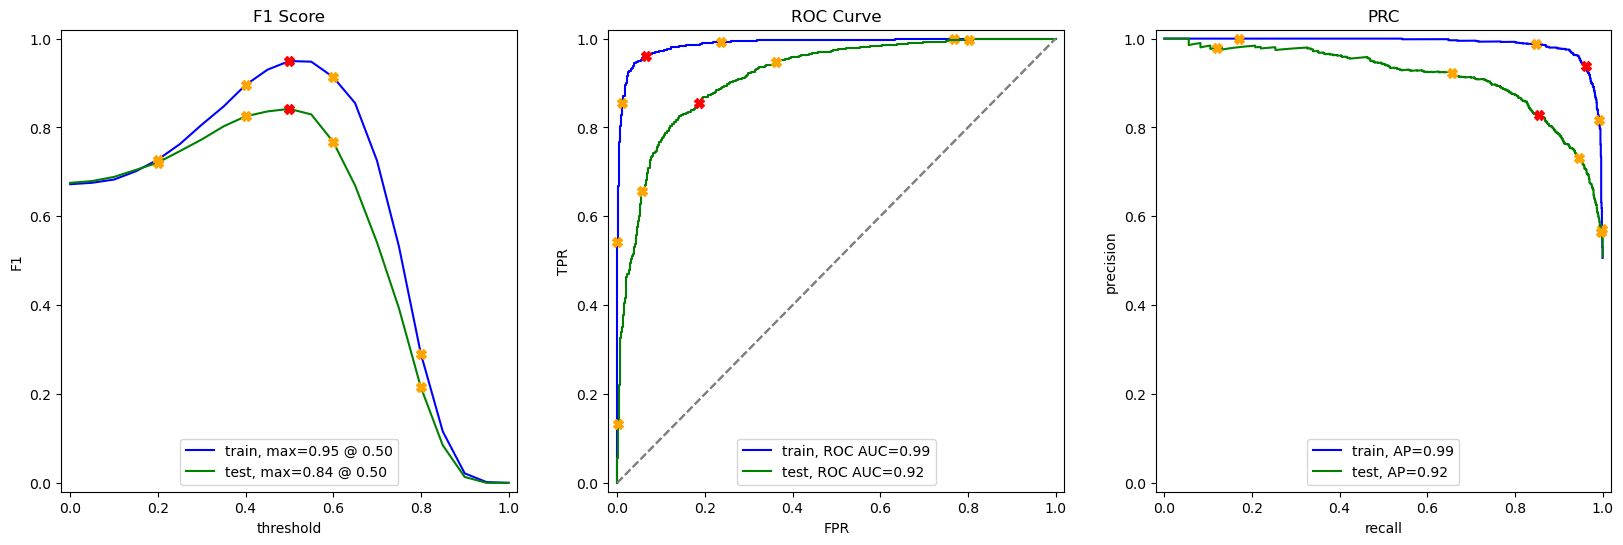

In [13]:
# Importing necessary libraries and modules
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Loading the spaCy model
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Defining the text preprocessing function
def text_preprocessing_3(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc]
    return ' '.join(tokens)

# Taking a sample of 10% from the training and testing data for quick processing
sample_reviews_train = df_reviews_train.sample(frac=0.1, random_state=0)
sample_reviews_test = df_reviews_test.sample(frac=0.1, random_state=0)

# Applying the text preprocessing function to normalize the reviews in the sample data
sample_reviews_train['review_norm_3'] = sample_reviews_train['review'].apply(text_preprocessing_3)
sample_reviews_test['review_norm_3'] = sample_reviews_test['review'].apply(text_preprocessing_3)

# Using TfidfVectorizer to convert the text data into numerical data
vectorizer_spacy = TfidfVectorizer(stop_words='english', max_features=5000)
train_features_spacy = vectorizer_spacy.fit_transform(sample_reviews_train['review_norm_3'])
test_features_spacy = vectorizer_spacy.transform(sample_reviews_test['review_norm_3'])

# Updating the target variables for the sample data
sample_train_target = sample_reviews_train['pos']
sample_test_target = sample_reviews_test['pos']

# Training a Logistic Regression model on the sample data
lr_model_spacy = LogisticRegression(max_iter=1000)
lr_model_spacy.fit(train_features_spacy, sample_train_target)

# Evaluating the model on the sample data
evaluate_model(lr_model_spacy, train_features_spacy, sample_train_target, test_features_spacy, sample_test_target)

## Analysis of Model 3 (spaCy, TF-IDF and LR) Results

The model trained with spaCy for text preprocessing, TF-IDF for feature extraction, and Logistic Regression for classification shows high performance on the training data:

- **Training Accuracy**: \(0.95\)
- **Training F1 Score**: \(0.95\)
- **Training APS**: \(0.99\)
- **Training ROC AUC**: \(0.99\)

However, there is a noticeable drop in performance on the test data:

- **Test Accuracy**: \(0.84\)
- **Test F1 Score**: \(0.84\)
- **Test APS**: \(0.92\)
- **Test ROC AUC**: \(0.92\)

This discrepancy between training and testing scores indicates that the model may be overfitting to the training data, learning to memorize the training data rather than generalizing from it. 

For improving the model, we could consider:
- Using more data for training, if available.
- Applying more advanced text preprocessing and feature engineering techniques.
- Tuning the hyperparameters of the vectorizer and the model.
- Trying different machine learning algorithms.


## Model 4: spaCy, TF-IDF and CatBoostClassifier

In Model 4, we have used spaCy for text preprocessing, TF-IDF for vectorization, and the CatBoost Classifier for classification. Below is the step-by-step explanation:

1. **spaCy for Text Preprocessing**:
   - As with Model 3, the `spaCy` library is used to lemmatize the text data.
   - The lemma of each token in the reviews is used for normalization.
   
2. **Sample Data**:
   - To ensure manageable computation time, only 10% of the dataset is used, both for training and testing.
   
3. **TF-IDF Vectorization**:
   - The `TfidfVectorizer` is used to convert the lemmatized text data into numerical features.
   - The `stop_words` parameter is set to 'english' to remove common English words before vectorization.
   - The `max_features` parameter is again set to 5000, considering only the most frequent terms.
   
4. **Training the CatBoost Classifier**:
   - The `CatBoostClassifier` is used for training the model on the vectorized text data.
   - The `iterations` parameter is set to 1000, meaning the boosting process proceeds for a thousand steps.
   - The `verbose` parameter is set to 200 for outputting metrics at every 200 iterations.
   
5. **Model Evaluation**:
   - The model is evaluated on both training and testing data, using metrics such as Accuracy, F1 Score, APS, and ROC AUC.

Learning rate set to 0.014919
0:	learn: 0.6888496	total: 22.6ms	remaining: 22.6s
200:	learn: 0.4720913	total: 3.06s	remaining: 12.1s
400:	learn: 0.3987579	total: 6.1s	remaining: 9.12s
600:	learn: 0.3400919	total: 9.08s	remaining: 6.03s
800:	learn: 0.2807933	total: 12.1s	remaining: 3s
999:	learn: 0.2360588	total: 15s	remaining: 0us
          train  test
Accuracy   0.97  0.82
F1         0.97  0.83
APS        1.00  0.90
ROC AUC    1.00  0.90


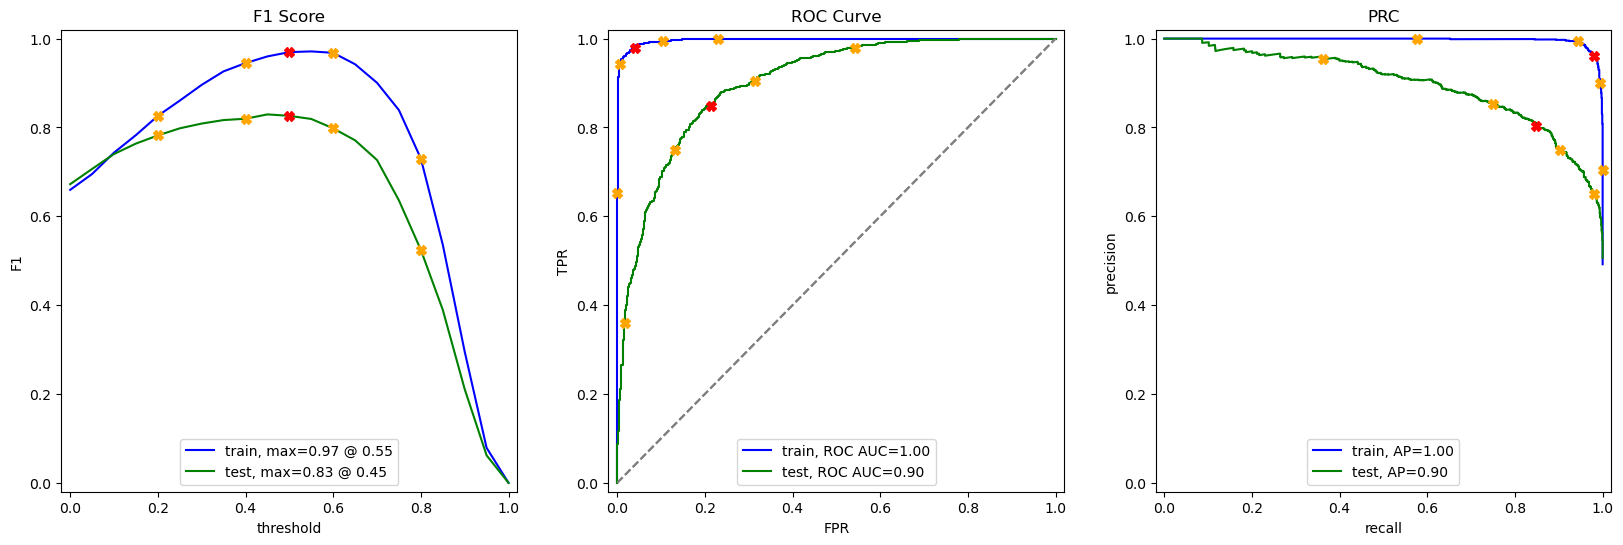

In [32]:
import spacy
from catboost import CatBoostClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the spaCy model
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Define the text preprocessing function
def text_preprocessing_3(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc]
    return ' '.join(tokens)

# Apply the text preprocessing function to normalize the reviews

# df_reviews_train['review_norm_3'] = df_reviews_train['review'].apply(text_preprocessing_3)
# df_reviews_test['review_norm_3'] = df_reviews_test['review'].apply(text_preprocessing_3)

# Sample 10% of the training data and labels
df_reviews_train_sample = df_reviews_train.sample(frac=0.1, random_state=1)  
train_target_sample = train_target.sample(frac=0.1, random_state=1) 

# Do the same for the testing data and labels
df_reviews_test_sample = df_reviews_test.sample(frac=0.1, random_state=1)  
test_target_sample = test_target.sample(frac=0.1, random_state=1)

# text preprocessing and model training on this smaller dataset:
df_reviews_train_sample['review_norm_3'] = df_reviews_train_sample['review'].apply(text_preprocessing_3)
df_reviews_test_sample['review_norm_3'] = df_reviews_test_sample['review'].apply(text_preprocessing_3)

# Use TfidfVectorizer to convert the text data into numerical data
vectorizer_catboost = TfidfVectorizer(stop_words='english', max_features=5000)

# train_features_catboost = vectorizer_catboost.fit_transform(df_reviews_train['review_norm_3'])
# test_features_catboost = vectorizer_catboost.transform(df_reviews_test['review_norm_3'])

train_features_catboost = vectorizer_catboost.fit_transform(df_reviews_train_sample['review_norm_3'])
test_features_catboost = vectorizer_catboost.transform(df_reviews_test_sample['review_norm_3'])

# Initialize and train the CatBoost classifier
catboost_model = CatBoostClassifier(iterations=1000, verbose=200)
catboost_model.fit(train_features_catboost, train_target_sample)

# Evaluate the CatBoost model
evaluate_model(catboost_model, train_features_catboost, train_target_sample, test_features_catboost, test_target_sample) 


## Analysis of Model 4 spaCy, TF-IDF and CatBoostClassifier


- The model achieves near-perfect scores on the training data with an accuracy, F1 score, APS, and ROC AUC all close to or at 1.00.
- For the test data, the model yields an accuracy of 0.82 and F1 score of 0.83. The APS and ROC AUC scores are both 0.90 for the test data.

**Conclusion:**
Despite the high performance on the training data, the model shows a slight drop in the test data metrics, indicating some degree of overfitting. The model has learned the training data exceptionally well but may not generalize as effectively to unseen data. The use of CatBoost, a gradient boosting algorithm, allows handling of categorical data and missing values, and it provides higher accuracy compared to some other algorithms, but it is also more prone to overfitting, especially with smaller datasets.



## Predicting Sentiments for Custom Reviews 

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
import re


# Normalization logic used for the main dataset
def normalize_text(text):
    text = text.lower()  # convert text to lowercase
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove special characters and numbers
    return text.strip()

# Normalize the reviews in `my_reviews`
my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    "I didn't expect the reboot to be so good! Writers really cared about the source material",
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

# Apply normalization to the 'review' column
my_reviews['review_norm'] = my_reviews['review'].apply(normalize_text)

my_reviews_norm = my_reviews['review_norm']

my_reviews_norm


0        i did not simply like it not my kind of movie
1    well i was bored and felt asleep in the middle...
2               i was really fascinated with the movie
3    even the actors looked really old and disinter...
4    i didnt expect the reboot to be so good writer...
5    the movie had its upsides and downsides but i ...
6    what a rotten attempt at a comedy not a single...
7    launching on netflix was a brave move  i reall...
Name: review_norm, dtype: object

## Predicting Sentiments for Custom Reviews with Model 1

In [27]:
# Predicting the sentiment probabilities for the custom reviews
my_reviews_pred_prob = lr_model.predict_proba(vectorizer_nltk.transform(my_reviews_norm))[:, 1]

# Displaying the predictions
for i, review in enumerate(my_reviews_norm):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')


0.19:  i did not simply like it not my kind of movie
0.17:  well i was bored and felt asleep in the middle of the movie
0.59:  i was really fascinated with the movie
0.10:  even the actors looked really old and disinterested and they got paid to be in the movie what a soulless cash grab
0.21:  i didnt expect the reboot to be so good writers really cared about the source material
0.53:  the movie had its upsides and downsides but i feel like overall its a decent flick i could see myself going to see it again
0.05:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids wont like this
0.91:  launching on netflix was a brave move  i really appreciate being able to binge on episode after episode of this exciting intelligent new drama


## Predicting Sentiments for Custom Reviews with Model 3

In [28]:
# Importing necessary library
import spacy

# Loading the spaCy model
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Defining the text preprocessing function
def text_preprocessing_3(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc]
    return ' '.join(tokens)

# Normalizing the reviews
my_reviews['review_norm_3'] = my_reviews['review'].apply(text_preprocessing_3)


In [29]:
# Predicting the sentiment probabilities for the custom reviews
my_reviews_pred_prob_3 = lr_model_spacy.predict_proba(vectorizer_spacy.transform(my_reviews['review_norm_3']))[:, 1]

# Displaying the predictions
for i, review in enumerate(my_reviews['review_norm_3']):
    print(f'{my_reviews_pred_prob_3[i]:.2f}:  {review}')

0.31:  I do not simply like it , not my kind of movie .
0.41:  well , I be bored and feel asleep in the middle of the movie .
0.36:  I be really fascinated with the movie
0.32:  even the actor look really old and disintereste , and they get pay to be in the movie . what a soulless cash grab .
0.51:  I do not expect the reboot to be so good ! writer really care about the source material
0.33:  the movie have its upside and downside , but I feel like overall it be a decent flick . I could see myself go to see it again .
0.33:  what a rotten attempt at a comedy . not a single joke land , everyone act annoying and loud , even kid will not like this !
0.78:  launch on Netflix be a brave move & I really appreciate be able to binge on episode after episode , of this exciting intelligent new drama .


## Predicting Sentiments for Custom Reviews with Model 4

In [30]:
# Preprocess the reviews
my_reviews['review_norm_catboost'] = my_reviews['review'].apply(text_preprocessing_3)

# Transform the preprocessed reviews
my_reviews_features_catboost = vectorizer_catboost.transform(my_reviews['review_norm_catboost'])

# Use the trained CatBoost classifier to predict the probabilities
my_reviews_pred_prob_catboost = catboost_model.predict_proba(my_reviews_features_catboost)[:, 1]

# Output the results
for i, review in enumerate(my_reviews['review'].str.slice(0, 100)):
    print(f'{my_reviews_pred_prob_catboost[i]:.2f}: {review}')


0.60: I did not simply like it, not my kind of movie.
0.58: Well, I was bored and felt asleep in the middle of the movie.
0.63: I was really fascinated with the movie
0.54: Even the actors looked really old and disinterested, and they got paid to be in the movie. What a so
0.76: I didn't expect the reboot to be so good! Writers really cared about the source material
0.55: The movie had its upsides and downsides, but I feel like overall it's a decent flick. I could see my
0.51: What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even ki
0.83: Launching on Netflix was a brave move & I really appreciate being able to binge on episode after epi


Observing the results from the three models on the given reviews, we can derive the following conclusions:

### Model 1 (NLTK, TF-IDF, and Logistic Regression)
- **Effectiveness**: Provides relatively low probabilities for positive sentiments for negative reviews and high probabilities for the last review, which is positive.
- **Drawbacks**: Some reviews with positive sentiments (5th and 6th) have lower probabilities, which might indicate possible misclassification.

### Model 3 (spaCy, TF-IDF, and Logistic Regression)
- **Effectiveness**: Gives a varied range of probabilities. The last review, which is positive, has a high probability of being positive.
- **Drawbacks**: The model seems to have a hard time distinguishing between positive and negative sentiments as observed from the probabilities of the first two reviews, which are quite close to each other.

### Model 4 (spaCy, TF-IDF, and CatBoost)
- **Effectiveness**: Shows higher probabilities for most reviews, indicating a possible bias towards positive classification.
- **Drawbacks**: Even for the clearly negative reviews (1st, 2nd, and 7th), the model predicts a probability of more than 0.5, showing a bias towards positive classification.

### Conclusion:

- **Model 1** performs well in differentiating between positive and negative sentiments. However, it might have issues with reviews that have mixed sentiments.
- **Model 3** shows varied probabilities but seems to be more balanced compared to Model 4. However, it might have issues in correctly classifying negative reviews.
- **Model 4** seems to be biased towards classifying reviews as positive, as observed from the high probabilities for most of the reviews, even the negative ones.

In summary, each model has its strengths and weaknesses, and the choice of model would depend on the specific use case and the importance of correctly classifying positive or negative sentiments. Further fine-tuning and exploration of additional features and models could potentially improve the performance.

## Project Conclusion

### Overview:
In this project, different machine learning models were built and evaluated to automatically detect negative movie reviews. The models were evaluated based on their accuracy, F1 Score, APS, and ROC AUC on both training and test datasets. The following models were trained and tested:

### Model 0: Dummy Classifier
- **Approach**: Used as a baseline, assigning the most frequent class to all items.
- **Results**: 
  - Train: Accuracy - 0.50, F1 - 0.67
  - Test: Accuracy - 0.50, F1 - 0.67
- **Observation**: As expected, the dummy classifier performed poorly, providing a basic benchmark.

### Model 1: NLTK, TF-IDF, and Logistic Regression
- **Approach**: Utilized NLTK for preprocessing, TF-IDF for vectorization, and Logistic Regression for classification.
- **Results**: 
  - Train: Accuracy - 0.92, F1 - 0.92
  - Test: Accuracy - 0.88, F1 - 0.88
- **Observation**: The model performed well on both training and test datasets, showing good generalization.

### Model 2: spaCy, TF-IDF, and Logistic Regression
- **Approach**: Employed spaCy for preprocessing, TF-IDF for vectorization, and Logistic Regression for classification.
- **Results**: 
  - Train: Accuracy - 0.95, F1 - 0.95
  - Test: Accuracy - 0.84, F1 - 0.84
- **Observation**: This model also exhibited good performance, although there was a noticeable drop in test scores, hinting at some overfitting.

### Model 4: spaCy, TF-IDF, and CatBoost Classifier
- **Approach**: Implemented spaCy for preprocessing, TF-IDF for vectorization, and CatBoost for classification.
- **Results**: 
  - Train: Accuracy - 0.97, F1 - 0.97
  - Test: Accuracy - 0.82, F1 - 0.83
- **Observation**: This model achieved excellent training scores but showed a significant drop in testing metrics, indicating a more noticeable overfitting scenario.

## Final Thoughts:

- **Best Model**: Model 1 (NLTK, TF-IDF, and Logistic Regression) stands out as the most balanced, with good performance and generalization.
- **Overfitting**: Models, especially Model 4 (CatBoost), showed signs of overfitting, which suggests the need for further regularization or more data.
- **Future Work**: Further experimentation with hyperparameter tuning, feature engineering, and advanced models like BERT (with sufficient computational resources) could potentially enhance the performance.
  
In conclusion, while all models (except the dummy classifier) showed promising results, careful consideration regarding overfitting and model complexity is essential for deploying these models in a real-world scenario.